In [23]:
import wfdb
from wfdb import processing
import os
import matplotlib.pyplot as plt
import wfdb_custom
import numpy as np


### Set Dataset Path
dataset_path = "/home/ec2-user/SageMaker/physionet.org/files/challenge-2016/1.0.0" 
folder = '/training-a/'
files = os.listdir(dataset_path + folder)

In [24]:
#extract .wav file names only (folder has .hea , .dat as well)
wav_files  = sorted([file for file in files if '.wav' in file])

In [55]:
def metadata(x):
    '''
        Accepts: a file id, x
        Returns: Prints parameters about a specific record
                 Plots the locally detected peaks
    
    '''
    
    rec = wav_files[x][:-4]

    record = wfdb.rdrecord(dataset_path + folder+rec) 
    
    print(record.sig_name)
    print(record.comments)
    print(record.record_name)
    print(record.fs)
    
    a = record.p_signal[:,0]
    
    
    pcg_p = wfdb.processing.find_local_peaks(record.p_signal[:,0],1000) 
    ecg_p = wfdb.processing.find_local_peaks(record.p_signal[:,1],1000) 
    peaks = [pcg_p , ecg_p]
    
    wfdb_custom.plot_wfdb(100,14000,peaks,record=record, title='Record ' + rec + ' from PhysioNet Challenge 2016' + ' => ' + record.__dict__['comments'][0],figsize=(20,10), time_units = 'samples',ecg_grids=[1]) 
    
    
    plt.plot(a)

['PCG', 'ECG']
['Abnormal']
a0001
2000


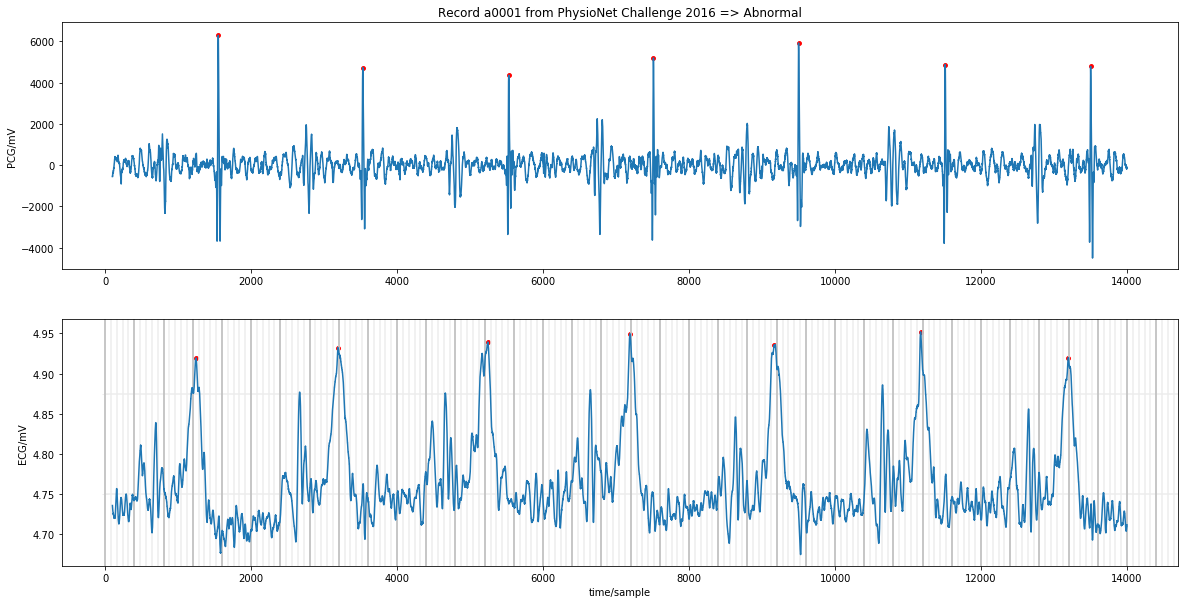

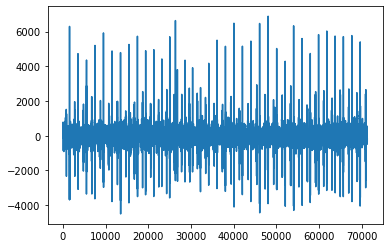

In [56]:
metadata(0)